<a href="https://colab.research.google.com/github/Saibhossain/visual-Transformers_-ViT-/blob/main/Image_to_Image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image-to-Image Generator (Img2Img)



In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "runwayml/stable-diffusion-v1-5" # Or "SG161222/Realistic_Vision_V5.1_noVAE"

print(f"Loading Img2Img Model: {model_id}...")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

Loading Img2Img Model: runwayml/stable-diffusion-v1-5...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Original Image:


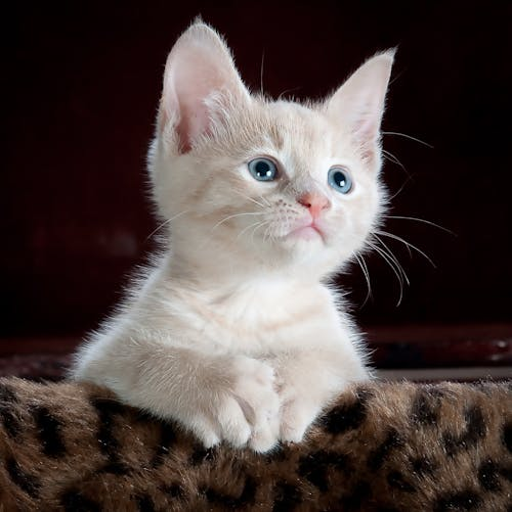

In [ ]:
imgs = "/content/cat.jpeg"

def load_image(image_source):
    if image_source.startswith("http"):
        response = requests.get(image_source)
        img = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        img = Image.open(image_source).convert("RGB")

    img = img.resize((512, 512))
    return img


init_image = load_image(imgs)
print("Original Image:")
display(init_image)


Transforming with strength 0.85...


  0%|          | 0/42 [00:00<?, ?it/s]

Generated Image:


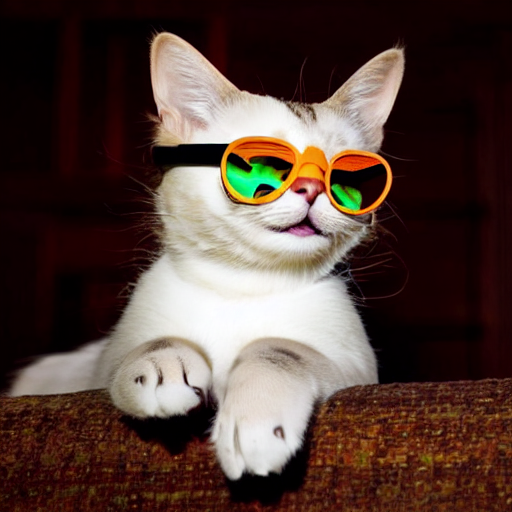

In [ ]:
# image generation
prompt = "cat wearing a sunglass and smiling"
strength = 0.85

print(f"\nTransforming with strength {strength}...")
images = pipe(
    prompt=prompt,
    image=init_image,
    strength=strength,
    guidance_scale=7.5
).images

print("Generated Image:")
display(images[0])